# Heart Disease Prediction

The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

We are working for an R&D company that focuses on providing healthcare solutions. The company has collected anonymized data from multiple hospitals on several patients. The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

We are tasked with using the dataset to accurately predict the likelihood of a new patient having heart disease in the future. The dataset has the following features:

    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]


In [1]:
import pandas as pd
import numpy as np
from itertools import compress

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns

## Importing and inspecting data

In [2]:
heart = pd.read_csv("../Datasets/heart_disease_prediction.csv")

In [3]:
print(print(heart.shape))
print(heart.info())

(918, 12)
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [4]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
print(f"Missing Data: \n{heart.isnull().sum()}")

Missing Data: 
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [6]:
print(heart.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [7]:
numeric_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_vars = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_var_name = ['Sex', 'Chest Pain Type', 'Fasting Blood Sugar', 'Resting Electrocardiogram', 'Exercise-Induced Angina?', 'ST Slope']

### Plots of categorical variable counts

M    0.78976
F    0.21024
Name: Sex, dtype: float64


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


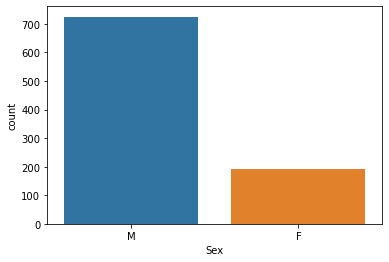

ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: ChestPainType, dtype: float64


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


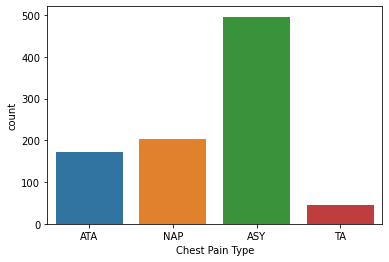

0    0.766885
1    0.233115
Name: FastingBS, dtype: float64


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


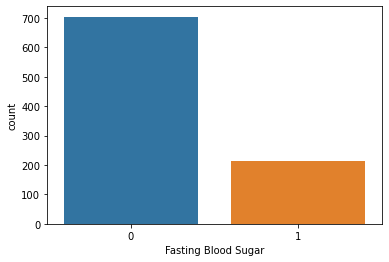

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Normal    0.601307
LVH       0.204793
ST        0.193900
Name: RestingECG, dtype: float64


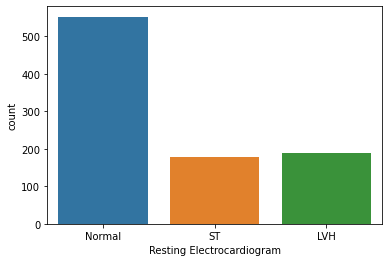

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.595861
Y    0.404139
Name: ExerciseAngina, dtype: float64


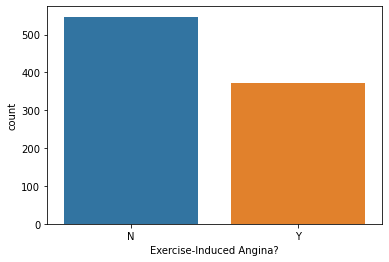

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Flat    0.501089
Up      0.430283
Down    0.068627
Name: ST_Slope, dtype: float64


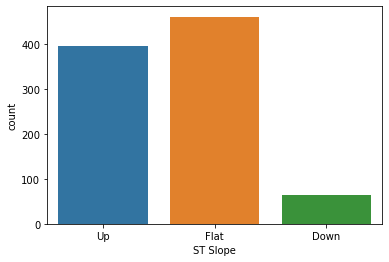

In [8]:
for col, name in zip(categorical_vars, categorical_var_name):
    print(heart[col].value_counts(normalize=True))
    sns.countplot(heart[col])
    plt.xlabel(name)
    plt.show()

### Plots of categorical variables by presence of heart disease

In [9]:
hd_cat_vals = heart.groupby('HeartDisease')['Sex'].value_counts()

In [10]:
hd_cat_vals.values

array([267, 143, 458,  50], dtype=int64)

  Sex  value  Heart Disease
0   F    143              0
1   F     50              1
2   M    267              0
3   M    458              1
  ChestPainType  value  Heart Disease
0           ASY    104              0
1           ASY    392              1
2           ATA    149              0
3           ATA     24              1
4           NAP    131              0
5           NAP     72              1
6            TA     26              0
7            TA     20              1
   FastingBS  value  Heart Disease
0          0    366              0
1          0    338              1
2          1     44              0
3          1    170              1
  RestingECG  value  Heart Disease
0        LVH     82              0
1        LVH    106              1
2     Normal    267              0
3     Normal    285              1
4         ST     61              0
5         ST    117              1
  ExerciseAngina  value  Heart Disease
0              N    355              0
1              N    

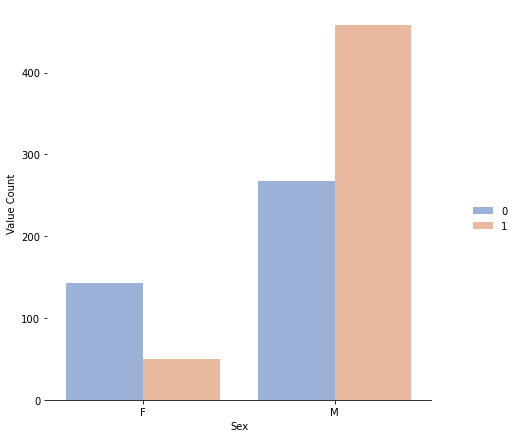

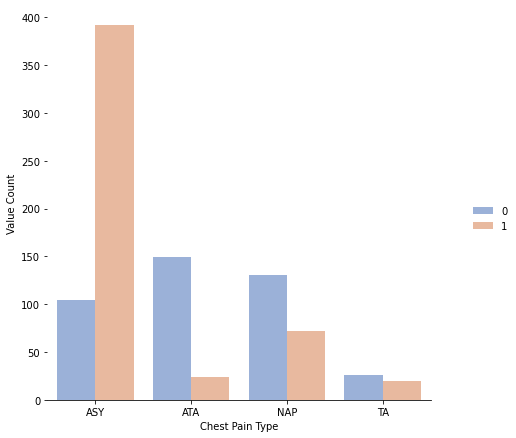

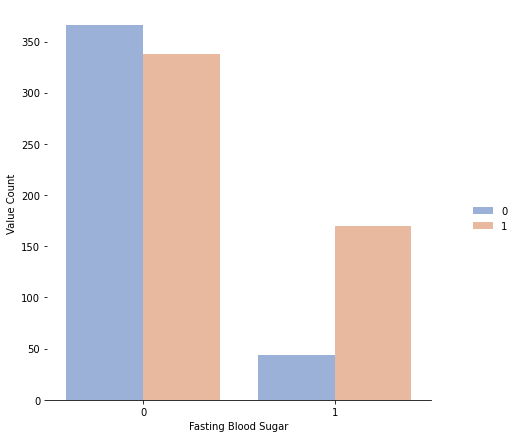

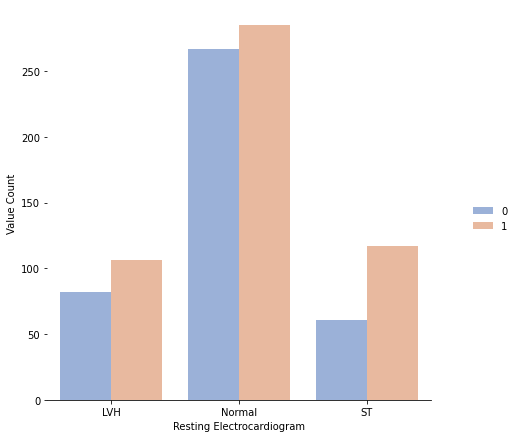

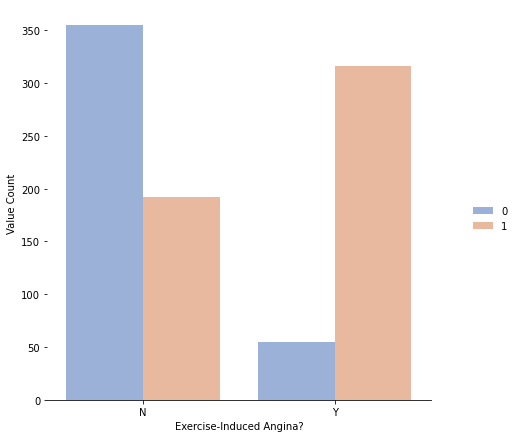

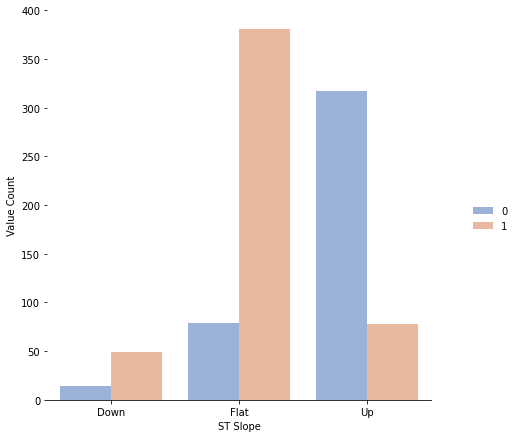

In [11]:
for col, name in zip(categorical_vars, categorical_var_name):
    
    plot_data = heart.groupby('HeartDisease')[col].value_counts().unstack()
    plot_data = plot_data.melt(value_vars=plot_data.columns)
    plot_data['Heart Disease'] = [0,1]*int(len(plot_data)/2)
    print(plot_data)
    
#     fig,ax = plt.subplots()
#     plot_data.plot(ax=ax, kind='barh', x=col, y='value')
    g = sns.catplot(
    data=plot_data, kind="bar",
    x=col, y="value", hue="Heart Disease",
    palette="muted", alpha=.6, height=6,
    )
    g.despine(left=True)
    g.set_axis_labels(name, "Value Count")
    g.legend.set_title('')
    g

In [12]:
print(heart['HeartDisease'].value_counts())
print(heart['HeartDisease'].value_counts(normalize=True))

1    508
0    410
Name: HeartDisease, dtype: int64
1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64


In [13]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
heart_corrs = heart.corr()
heart_corrs['HeartDisease'].sort_values()

MaxHR          -0.400421
Cholesterol    -0.232741
RestingBP       0.107589
FastingBS       0.267291
Age             0.282039
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

The average age of patients in this data set is middling--around 53, but with a lower minimum than expected--28 years old. However, most patients are between 47 and 60. Resting blood pressure is fairly normal on average, around 132. Mean cholesterol is also fairly normal (<200). The data set is dominated by men (79%) and people with normal fasting blood sugar (77%). The most predominant form of chest pain experienced in the data set is asymptomatic, followed by non-anginal pain. Most people did not experience angina. Regardless, nearly half of the people in the data set had heart disease (55%). The data set is not missing any values.

Problematically, ResingBP and Cholesterol have a minimum value of zero, which is not possible. These observations should probably be removed.

Interestingly, grouping the categorical values by the presence of heart disease shows several promising indicators. Men were more likely to have heart disease than women. Those with 'Asymptomatic' chest pain (without the presence of chest pain) were the most likely to have heart disease compared to any category with chest pain. Those with atypical angina appear less likely than others to have heart disease. Having high fasting blood sugar or exercise induced angina increased the likelihood of heart disease. Finally, those with a flat ST slope were more likely to have heart disease, and those with an upward ST slope were *less* likely to have heart disease.

Correlations with numeric variables revealed that Maximum heart rate showed a fairly strong negative association and 'Oldpeak' showed a fairly strong association with the presence of heart disease. That is, those with higher maximum heart rate were less likely to have heart disease, and those with higher 'Oldpeak' were more likely to have heart disease. Age is mildly positively associated with heart disease, with higher age relating to higher likelihood.

Based on these observations, several features seem worth including in our model: age, sex, chest pain type, fasting blood sugar, ST slope, maximum heart rate, and oldpeak. It is worth assessing whether blood pressure and cholesterol should be included after 0 values are removed and correlations are re-run.

In [15]:
heart.info()
cat_feats = ['ChestPainType', 'FastingBS', 'ST_Slope']
num_feats = ['Age', 'MaxHR', 'Oldpeak']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Cleaning odd RestingBP and Cholesterol data

In [16]:
print(len(heart[heart['RestingBP']==0]))
heart[heart['RestingBP']==0]

1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [17]:
heart.drop(heart[heart['RestingBP']==0].index, inplace=True)

In [18]:
print(len(heart[heart['Cholesterol']==0]))
heart[heart['Cholesterol']==0]

171


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [19]:
for hd in [0,1]:
    heart.loc[(heart['Cholesterol']==0) & (heart['HeartDisease']==hd), 'Cholesterol'] = heart.loc[heart['HeartDisease']==hd, 'Cholesterol'].median()

In [20]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,239.700109,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,54.352727,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,225.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [21]:
heart_corrs = heart.corr()
heart_corrs['HeartDisease'].sort_values()

MaxHR          -0.401410
Cholesterol     0.024914
RestingBP       0.117990
FastingBS       0.267994
Age             0.282012
Oldpeak         0.403638
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

<AxesSubplot:>

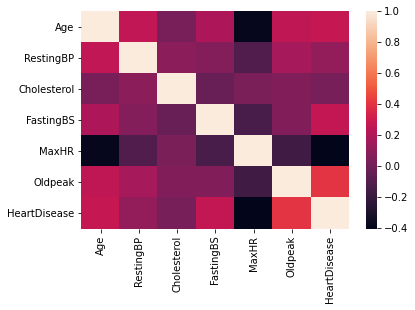

In [22]:
sns.heatmap(heart_corrs)

Even after cleaning, cholesterol and resting blood pressure do not appear to be strongly related to the presence of heart disease in our data set, at least in isolation.

## Model prep

In [23]:
heart_dum = pd.get_dummies(data = heart, columns = cat_feats, drop_first = True)

In [24]:
heart_dum_corrs = heart_dum.corr()
heart_dum_corrs['HeartDisease'].sort_values()

ST_Slope_Up         -0.621843
ChestPainType_ATA   -0.401680
MaxHR               -0.401410
ChestPainType_NAP   -0.215311
ChestPainType_TA    -0.054591
Cholesterol          0.024914
RestingBP            0.117990
FastingBS_1          0.267994
Age                  0.282012
Oldpeak              0.403638
ST_Slope_Flat        0.553700
HeartDisease         1.000000
Name: HeartDisease, dtype: float64

In [25]:
unused_cat_vars = list(compress(categorical_vars, [var not in cat_feats for var in categorical_vars]))
unused_cat_vars

['Sex', 'RestingECG', 'ExerciseAngina']

In [26]:
unused_num_vars = list(compress(numeric_vars, [var not in num_feats for var in numeric_vars]))
unused_num_vars

['RestingBP', 'Cholesterol']

In [28]:
heart_dum.drop(columns=unused_cat_vars + unused_num_vars + ['ChestPainType_TA'], inplace=True)

Looking at correlations, `ChestPainType_TA` is the only variable with an unreasonably low correlation of those we had already decided to include, so let's exclude it.

In [30]:
heart_dum.head()

,Age,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,FastingBS_1,ST_Slope_Flat,ST_Slope_Up
0,40,172,0.0,0,1,0,0,0,1
1,49,156,1.0,1,0,1,0,1,0
2,37,98,0.0,0,1,0,0,0,1
3,48,108,1.5,1,0,0,0,1,0
4,54,122,0.0,0,0,1,0,0,1


In [31]:
X = heart_dum.drop(columns='HeartDisease')
y = heart_dum['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [32]:
minmax = MinMaxScaler()

## Exploring model features

In [34]:
model_feats = X.columns.tolist()
model_feats

['Age',
 'MaxHR',
 'Oldpeak',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'FastingBS_1',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [41]:
accuracies_feats = {}
for feat in model_feats: 
    X_train_scaled = minmax.fit_transform(X_train[[feat]])
    X_test_scaled = minmax.transform(X_test[[feat]])
    knc = KNeighborsClassifier(n_neighbors=25)
    knc.fit(X_train_scaled, y_train)
    acc = knc.score(X_test_scaled, y_test)
    accuracies_feats[feat] = acc

In [42]:
accuracies_feats_df = pd.DataFrame.from_dict(accuracies_feats, orient='index', columns=['val'])
accuracies_feats_df

,val
Age,0.603261
MaxHR,0.625000
Oldpeak,0.717391
ChestPainType_ATA,0.701087
ChestPainType_NAP,0.581522
FastingBS_1,0.603261
ST_Slope_Flat,0.760870
ST_Slope_Up,0.831522


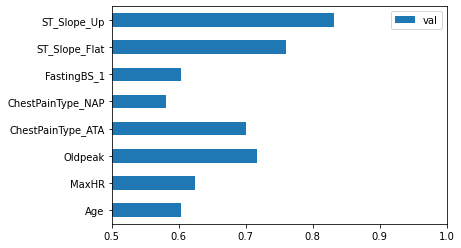

In [46]:
accuracies_feats_df.plot.barh()
plt.xlim([.5,1])
plt.show()

Clearly, the ST slope variables, ATA chest pain, and Oldpeak are the most valuable variables individually. Let's compare a model with just those variables to a model with all variables.

### Comparing models with all chosen variables vs. only highest performing

In [47]:
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)
knc = KNeighborsClassifier(n_neighbors=25)
knc.fit(X_train_scaled, y_train)
m_all_feats_acc = knc.score(X_test_scaled, y_test)
print(m_all_feats_acc)

0.8369565217391305


In [83]:
top_4_feat = ['ST_Slope_Up', 'ST_Slope_Flat', 'ChestPainType_ATA', 'Oldpeak']

In [84]:
X_train_scaled = minmax.fit_transform(X_train[top_4_feat])
X_test_scaled = minmax.transform(X_test[top_4_feat])
knc = KNeighborsClassifier(n_neighbors=25)
knc.fit(X_train_scaled, y_train)
m_4top_feats_acc = knc.score(X_test_scaled, y_test)
print(m_4top_feats_acc)

0.8478260869565217


In [49]:
X_train_scaled = minmax.fit_transform(X_train[['ST_Slope_Up', 'ST_Slope_Flat']])
X_test_scaled = minmax.transform(X_test[['ST_Slope_Up', 'ST_Slope_Flat']])
knc = KNeighborsClassifier(n_neighbors=25)
knc.fit(X_train_scaled, y_train)
m_2top_feats_acc = knc.score(X_test_scaled, y_test)
print(m_2top_feats_acc)

0.8315217391304348


These comparisons show that a model with the top four performing features performs slightly better than a model with all chosen variables, and both beat a model with only the top two features.

## Exploring Model Parameters

### Model with 4 top features

In [55]:
X_train_scaled = minmax.fit_transform(X_train[top_4_feat])
X_test_scaled = minmax.transform(X_test[top_4_feat])

In [67]:
parameters = {'n_neighbors': [10, 15, 20, 25, 30,35], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3, 4]}
knc = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knc, param_grid=parameters, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 15, 20, 25, 30, 35],
                         'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [68]:
best_score = grid_search.best_score_
best_params = grid_search.best_params_
print(best_score, best_params, sep='\n')

0.8103997763488957
{'n_neighbors': 35, 'p': 1, 'weights': 'uniform'}


In [69]:
grid_search_results = pd.DataFrame(grid_search.cv_results_)

In [70]:
grid_search_results.iloc[grid_search_results['rank_test_score'].nsmallest(5).index]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
40,0.003219,0.003943,0.004473,0.002954,35,1,uniform,"{'n_neighbors': 35, 'p': 1, 'weights': 'uniform'}",0.748299,0.863946,0.795918,0.794521,0.849315,0.810400,0.041713,1
42,0.000411,0.000823,0.007684,0.003923,35,2,uniform,"{'n_neighbors': 35, 'p': 2, 'weights': 'uniform'}",0.748299,0.863946,0.795918,0.794521,0.849315,0.810400,0.041713,1
44,0.002440,0.002963,0.009310,0.001000,35,3,uniform,"{'n_neighbors': 35, 'p': 3, 'weights': 'uniform'}",0.748299,0.863946,0.795918,0.794521,0.849315,0.810400,0.041713,1
46,0.003229,0.003955,0.008517,0.003229,35,4,uniform,"{'n_neighbors': 35, 'p': 4, 'weights': 'uniform'}",0.748299,0.863946,0.795918,0.794521,0.849315,0.810400,0.041713,1
32,0.000000,0.000000,0.008094,0.003119,30,1,uniform,"{'n_neighbors': 30, 'p': 1, 'weights': 'uniform'}",0.755102,0.863946,0.782313,0.794521,0.849315,0.809039,0.041161,5


In [72]:
accuracy = grid_search.best_estimator_.score(X_test_scaled, y_test)
print(f" Model Accuracy on test set: {accuracy*100:.2f}%")

 Model Accuracy on test set: 84.78%


These results suggest that with the top 4 parameters, the best fit comes with the 35 nearest neighbors and a Manhattan distance metric. The fit isn't terribly good, but it is not too bad overall, around 80%. We might be able to maximize the performance by assessing effects of including other features and changing the train/test sample size.

### Model with all top features

In [73]:
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [74]:
parameters = {'n_neighbors': [10, 15, 20, 25, 30,35], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3, 4]}
knc = KNeighborsClassifier()
grid_search_all = GridSearchCV(estimator=knc, param_grid=parameters, scoring='accuracy')
grid_search_all.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 15, 20, 25, 30, 35],
                         'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [75]:
best_score = grid_search_all.best_score_
best_params = grid_search_all.best_params_
print(best_score, best_params, sep='\n')

0.848616158792284
{'n_neighbors': 25, 'p': 1, 'weights': 'distance'}


In [76]:
grid_search_all_results = pd.DataFrame(grid_search_all.cv_results_)

In [77]:
grid_search_all_results.iloc[grid_search_all_results['rank_test_score'].nsmallest(5).index]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
25,0.001797,0.000399,0.003589,0.000488,25,1,distance,"{'n_neighbors': 25, 'p': 1, 'weights': 'distan...",0.795918,0.884354,0.829932,0.828767,0.904110,0.848616,0.039691,1
17,0.002194,0.000399,0.003391,0.000489,20,1,distance,"{'n_neighbors': 20, 'p': 1, 'weights': 'distan...",0.795918,0.891156,0.836735,0.821918,0.897260,0.848598,0.039514,2
9,0.001795,0.000399,0.003191,0.000399,15,1,distance,"{'n_neighbors': 15, 'p': 1, 'weights': 'distan...",0.795918,0.897959,0.836735,0.808219,0.904110,0.848588,0.044865,3
41,0.002193,0.000746,0.003790,0.000746,35,1,distance,"{'n_neighbors': 35, 'p': 1, 'weights': 'distan...",0.775510,0.884354,0.809524,0.849315,0.904110,0.844562,0.047218,4
33,0.001995,0.000630,0.003989,0.000632,30,1,distance,"{'n_neighbors': 30, 'p': 1, 'weights': 'distan...",0.775510,0.891156,0.823129,0.821918,0.910959,0.844535,0.049638,5


In [81]:
accuracy = grid_search_all.best_estimator_.score(X_test_scaled, y_test)
print(f" Model Accuracy on test set: {accuracy*100:.2f}%")

 Model Accuracy on test set: 83.70%


These results show that with the top 8 parameters from the data set (pre-choen), the best fit comes with the 25 nearest neighbors and a Manhattan distance metric. The fit here also isn't terribly good, but it is a little better than the 4-parameter model in accuracy on the training set and a little worse in accuracy on the testing set. 

Now let's play with the train/test sample size with the two top models:
- 4-feature model with 35 neighbors, p=1, weights='uniform'
- 8-feature model with 25 neighbors, p=1, weights='distance' 


In [82]:
X_train.head()

,Age,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,FastingBS_1,ST_Slope_Flat,ST_Slope_Up
380,60,99,0.5,0,0,0,1,0
89,55,110,0.5,0,0,0,1,0
591,58,110,0.0,0,0,0,0,1
239,48,102,3.0,0,0,0,1,0
395,38,150,0.0,0,0,1,1,0


## Exploring effect of train/test sample size on model fit

In [126]:
all_feat = X_train.columns.tolist()

In [128]:
print(all_feat, top_4_feat, sep='\n')

['Age', 'MaxHR', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'FastingBS_1', 'ST_Slope_Flat', 'ST_Slope_Up']
['ST_Slope_Up', 'ST_Slope_Flat', 'ChestPainType_ATA', 'Oldpeak']


In [132]:
test_props = np.arange(0.1,0.4,0.05)
nns = [25, 35]
_weights = ['uniform', 'distance']
feat_set = [all_feat, top_4_feat]
feat_set_names = ['8_features', '4_features']

In [134]:
train_test_accuracies = {'test_sample_prop':[], 'n_features':[], 'k':[], 'weights':[], 'accuracy':[]}

In [137]:
for prop in test_props:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=prop, random_state=4)
    for f, name in zip(feat_set, feat_set_names):
        X_train_scaled = minmax.fit_transform(X_train[f])
        X_test_scaled = minmax.transform(X_test[f])
        for n in nns:
            for w in _weights:
                knc = KNeighborsClassifier(n_neighbors=n, p=1, weights=w)
                knc.fit(X_train_scaled, y_train)
                acc = knc.score(X_test_scaled, y_test)
                # Create_record of trial
                train_test_accuracies['test_sample_prop'].append(prop)
                train_test_accuracies['n_features'].append(name)
                train_test_accuracies['k'].append(n)
                train_test_accuracies['weights'].append(w)
                train_test_accuracies['accuracy'].append(acc)

In [143]:
train_test_accuracies_df = pd.DataFrame.from_dict(train_test_accuracies)
train_test_accuracies_df.sort_values('accuracy', ascending=False)[:10]

,test_sample_prop,features,k,weights,accuracy
72,0.2,8_features,25,uniform,0.847826
78,0.2,4_features,35,uniform,0.847826
4,0.1,4_features,25,uniform,0.847826
76,0.2,4_features,25,uniform,0.847826
60,0.1,4_features,25,uniform,0.847826
22,0.2,4_features,35,uniform,0.847826
20,0.2,4_features,25,uniform,0.847826
16,0.2,8_features,25,uniform,0.847826
18,0.2,8_features,35,uniform,0.842391
74,0.2,8_features,35,uniform,0.842391


In [142]:
train_test_accuracies_df.sort_values('accuracy', ascending=False)[-5:]

,test_sample_prop,features,k,weights,accuracy
85,0.25,4_features,25,distance,0.765217
53,0.40,4_features,25,distance,0.760218
109,0.40,4_features,25,distance,0.760218
55,0.40,4_features,35,distance,0.760218
111,0.40,4_features,35,distance,0.760218


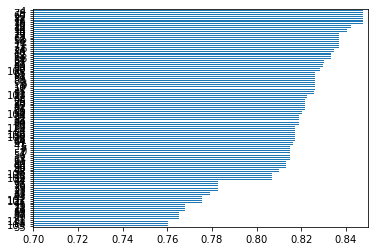

In [140]:
train_test_accuracies_df['accuracy'].sort_values().plot.barh()
plt.xlim([.7,.85])
plt.show()

These results showed a tie in the top 8 models, performing at 84.8% accuracy--a slight improvement over the top model in the previous step. All of the top models used uniform weighting for the nearest neighbors. Six of eight also used 25 nearest neighbors and only 4 features. Six of the top eight tied models used 20% of the sample in the testing data set and 80% in the training data set. The worst models, which performed at around 76-78% accuracy, all used distance weighting and most included 40% of the data in the testing set, 60% in the training set.

Now we will see whether the model has any better accuracy when the random seed for choosing the training & testing sets is changed.

## Iterations with different random seeds

In [145]:
test_props = [0.1,0.2]
nns = [25, 35]
feat_set = [all_feat, top_4_feat]
feat_set_names = ['8_features', '4_features']
rand_iter_accuracies = {'iter':[], 'test_sample_prop':[], 'n_features':[], 'k':[], 'accuracy':[]}

In [146]:
for rand in range(0, 100):
    for prop in test_props:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=prop, random_state=4+rand)
        for f, name in zip(feat_set, feat_set_names):
            X_train_scaled = minmax.fit_transform(X_train[f])
            X_test_scaled = minmax.transform(X_test[f])
            for n in nns:
                knc = KNeighborsClassifier(n_neighbors=n, p=1, weights=w)
                knc.fit(X_train_scaled, y_train)
                acc = knc.score(X_test_scaled, y_test)
                # Create_record of trial
                rand_iter_accuracies['iter'].append(4+rand)
                rand_iter_accuracies['test_sample_prop'].append(prop)
                rand_iter_accuracies['n_features'].append(name)
                rand_iter_accuracies['k'].append(n)
                rand_iter_accuracies['accuracy'].append(acc)

In [162]:
rand_iter_accuracies_df = pd.DataFrame.from_dict(rand_iter_accuracies)
rand_iter_accuracies_df = rand_iter_accuracies_df.sort_values('accuracy', ascending=False)
rand_iter_accuracies_df

,iter,test_sample_prop,n_features,k,accuracy
448,60,0.1,8_features,25,0.934783
16,6,0.1,8_features,25,0.923913
704,92,0.1,8_features,25,0.923913
449,60,0.1,8_features,35,0.923913
161,24,0.1,8_features,35,0.923913
...,...,...,...,...,...
618,81,0.1,4_features,25,0.684783
378,51,0.1,4_features,25,0.673913
59,11,0.1,4_features,35,0.673913
58,11,0.1,4_features,25,0.673913


In [163]:
rand_iter_accuracies_df[rand_iter_accuracies_df['n_features']=='4_features'][:5]

,iter,test_sample_prop,n_features,k,accuracy
483,64,0.1,4_features,35,0.858696
651,85,0.1,4_features,35,0.858696
482,64,0.1,4_features,25,0.858696
707,92,0.1,4_features,35,0.858696
75,13,0.1,4_features,35,0.858696


In [160]:
all_feat

['Age',
 'MaxHR',
 'Oldpeak',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'FastingBS_1',
 'ST_Slope_Flat',
 'ST_Slope_Up']

These results showed that we can maximize the accuracy of the model based on the chosen random seed. The best classifiction accuracy was 93.5%, followed closely by 5 models that performed at 92.4%. This result shows that this model can use eight features of the data set--age, maximum heart rate, whether they are experiencing atypical anginal or non-anginal chest pain, presence of high fasting blood sugar, flat or upward ST slopes, and Oldpeak--to classify patients' likelihood of heart disease. If all of these features can be extracted easily from patients in the future, we would have a fairly good chance of diagnosing their likelihood of having heart disease. 

Unfortunately, we cannot pare down our model and maintain accuracy. Although extracting fewer features from patients would be ideal for diagnosis, the highest accuracy for a 4-feature model was only 85.7%, which is meaningfully less than the best models. However, this level of certainty may still be useful to medical professionals, and they may be better suited to make the decision on which model should be used in future predictive settings. 

The main drawbacks of our model is that its accuracy may not be high enough and its training sets might not be representative enough of those who are admitted into a hospital--after all, only 21% of the patients are women! But again, the model's utility might be better decided by medical professionals. Another issue--unseen by myself until now, is that I should have been testing my different model iterations on a validation set, not the test set. I may have introduced bias into the model by training it repeatedly.